<h2>此次为opencv中<strong>绘制函数</strong>的应用</h2>

<h4><strong>目标</strong></h4>

<p><strong>*</strong>学习使用opencv绘制不同几何图形<br>
<strong>*</strong> 以下将包含这些函数:<br>
<ol>
<strong>
<li>cv2.line()</li>
<li>cv2.circle()</li>
<li>cv2.rectangle()</li>
<li>cv2.ellipse()</li>
<li>cv2.putText()</li>
</strong>
</ol>

#### 代码介绍
上面所有的这些绘图函数需要设置下面这些参数:

• **img**：你想要绘制图形的那幅图像。

• **color**：形状的颜色。以 RGB 为例，需要传入一个元组，例如：（255,0,0）代表蓝色。对于灰度图只需要传入灰度值。  

• **thickness**：线条的粗细。如果给一个闭合图形设置为 -1，那么这个图形  
就会被填充。默认值是 1.

• **linetype**：线条的类型，8 连接，抗锯齿等。默认情况是 8 连接。cv2.LINE_AA
为抗锯齿，这样看起来会非常平滑。

**注意:因为提供的是RGB颜色，所以上述代码只能在RGB图，即彩图中操作！**


In [2]:
#导入必要的模块
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#定义简化展示函数
def show(img,title = 'Draw'):
    cv2.imshow(title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
#画线函数应用

#创建一个全0像素点的RGB图片
img = np.zeros((512,512,3),np.uint8)#像素上限为8为int
show(img)

#画线函数:参数依次为图片,起点,终点,线条颜色,线条粗细
img = cv2.line(img,(0,0),(500,500),(0,0,255),5)
show(img)

In [5]:
#画矩形函数应用

img = np.zeros((512,512,3),np.uint8)

#画矩形函数:参数依次为
img = cv2.rectangle(img,(100,100),(300,300),(0,255,0),5)
show(img)
print(img.shape)
print(img.dtype)

(512, 512, 3)
uint8


可以发现,opencv里的图像类别是**uint8**

(512, 512)
[[ 72  82  86 ... 156 122 154]
 [180  69 202 ...  92 129  94]
 [159 121  52 ... 202 106 219]
 ...
 [207 168 242 ...  26 134 237]
 [128  20 161 ... 105  52  89]
 [  4  51  66 ... 155 246  22]]
uint8


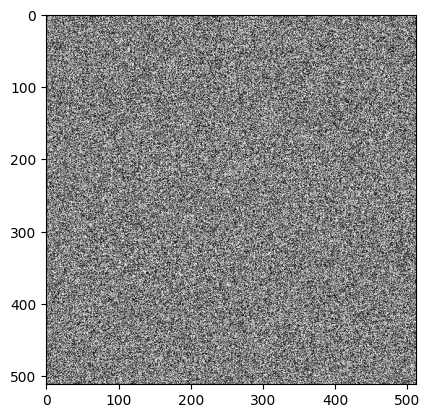

In [6]:
#也可以np生成灰度图
img = np.random.randint(0,256,size = (512,512),dtype = np.uint8)
print(img.shape)
print(img)
print(img.dtype)

#一定要指定uint8,是opencv默认的图像数据类型,如果不指定,默认为int32
plt.imshow(img,cmap = 'gray')#用plt展示要指定颜色解释器
plt.show()

In [7]:
#画圆函数

img = np.zeros((512,512,3),np.uint8)

#参数依次为图像,圆心位置,半径大小,线条颜色,线条粗细
img = cv2.circle(img,(250,250),50,(255,0,0),5)
show(img)

### 画椭圆比较复杂，我们要多输入几个参数。
1. 一个参数是中心点的位置坐标。
2. 下一个参数是长轴和短轴的长度。
3. 椭圆沿逆时针方向旋转的角度。
4. 椭圆弧演顺时针方向起始的角度和结束角度，如果是 0 很 360，就是整个椭圆。

**想知道更多上网查询**  
下面的例子是在图片的中心绘制半个椭圆。


In [7]:
#画椭圆函数

img = np.zeros((512,512,3),np.uint8)

#参数见上面介绍
img = cv2.ellipse(img,(250,250),(100,50),0,0,180,255,-1)
show(img)

In [8]:
#画多边形函数(原创)

def Build_polygon(pts,img,close = True):
    for i in range(1,len(pts)):
        ax = pts[i-1][0]
        ay = pts[i-1][1]
        bx = pts[i][0]
        by = pts[i][1]
        img = cv2.line(img,(ax,ay),(bx,by),(0,0,255),5)

    #要求闭合,默认参数是闭合,因为是多边形
    if(close):
        n = len(pts)
        img = cv2.line(img,(pts[0][0],pts[0][1]),(pts[n-1][0],pts[n-1][1]),(0,0,255),5)

    return img

pts = np.array([[30,45],[100,465],[256,500],[123,233],[355,9]],dtype = np.int32)#传入的点坐标数据类型必须为int32
print(pts)

#建立黑BGR图
img = np.zeros((512,512,3),np.uint8)
img = Build_polygon(pts,img)
show(img)

[[ 30  45]
 [100 465]
 [256 500]
 [123 233]
 [355   9]]


In [9]:
#在图片上添加文字,即文本渲染

img = np.ones((512,512,3),np.uint8)

#参数依次为图像,待绘制文字,起始位置,字体,字体大小,最后为一般属性(可以集成,如颜色之类的)
text = "Hello!Opencv!"
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img,text,(10,200),font,2.5,(255,255,255),2,cv2.LINE_AA)
show(img)

<p><strong>警 告：所 有 的 绘 图 函 数 的 返 回 值 都 是 None， 所 以 不 能 使 用 img =
cv2.line(img,(0,0),(511,511),(255,0,0),5)。</strong></p>
<p>但是好像我的代码都能跑